In [1]:
import numpy as np
from numpy import arange
from astropy.io import ascii
import astropy.units as u
from astropy.coordinates import Angle
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt
from astropy.modeling import models
from scipy.optimize import curve_fit

In [25]:
RA = 10
DEC = 10
R = 0.1
V_lim = 18
Cat_len = -1

In [26]:
# My_Cat = Table()
# make astropy SkyCoord object
coord = SkyCoord(ra=RA * u.degree, dec=DEC * u.degree, frame='icrs')
# set search cone   
radius = Angle(R * u.deg)
# set columns
V = Vizier(columns=['RAJ2000', 'DEJ2000',
                    '+_Gmag', 'Gmag', 'BPmag', 'pmRA', 'pmDE',
                    'RPmag', "_r", 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'W3mag', 'W4mag',
                    'gmag', 'imag', 'rmag', 'ymag', 'zmag', 'e_Gmag', 'e_BPmag','e_RPmag',
                    'e_Jmag','e_Hmag','e_Kmag',
                    'e_W1mag', 'e_W2mag', 'e_W3mag', 'e_W4mag',
                    'e_gmag', 'e_imag', 'e_rmag', 'e_ymag', 'e_zmag']) 
# set limit of rows, sort by distance default
V.ROW_LIMIT = Cat_len
catalog = ['I/355/gaiadr3', 'II/246/out', 'II/328/allwise', 'II/349/ps1']
# get data
Gaia_tab = V.query_region(coord, radius=radius, catalog=catalog)[0]
# Gaia_tab = V.query_region(coord, radius=radius, catalog=['I/355/gaiadr3'])
# print(Gaia_tab)
# print(Gaia_tab[0])



In [27]:
Gaia_tab

_r,RAJ2000,DEJ2000,Gmag,BPmag,pmRA,pmDE,RPmag,e_Gmag,e_BPmag,e_RPmag
,deg,deg,mag,mag,mas / yr,mas / yr,mag,mag,mag,mag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.095804,10.05945410301,9.92417556407,20.678057,20.861614,-0.639,-1.452,20.217699,0.010388,0.124852,0.098618
0.095195,10.06293726290,9.92785094164,19.488579,20.785307,17.983,-7.447,18.300808,0.003910,0.095569,0.025077
0.091522,10.07067225463,9.94065866833,19.035713,19.510466,15.391,-2.484,18.442076,0.003472,0.033697,0.021248
0.098387,10.00078581017,9.90167232089,19.844248,20.499269,-1.502,-12.355,19.066639,0.004906,0.122852,0.034208
0.099036,10.00124547914,9.90105059313,19.890486,20.644917,4.487,-17.368,18.830719,0.004824,0.134486,0.066579
0.086980,9.98918243757,9.91379048495,19.765535,21.287773,-9.835,-24.239,18.487906,0.004638,0.140826,0.022352
0.083878,9.98168856429,9.91815029454,20.255646,20.708618,-3.857,-13.352,19.613125,0.005960,0.096518,0.061826
0.094922,9.93201361159,9.93271197877,16.299690,16.734129,4.082,-0.209,15.693999,0.002793,0.004729,0.004423


In [5]:
Gaia_tab = np.load('gaia_cat.npy')

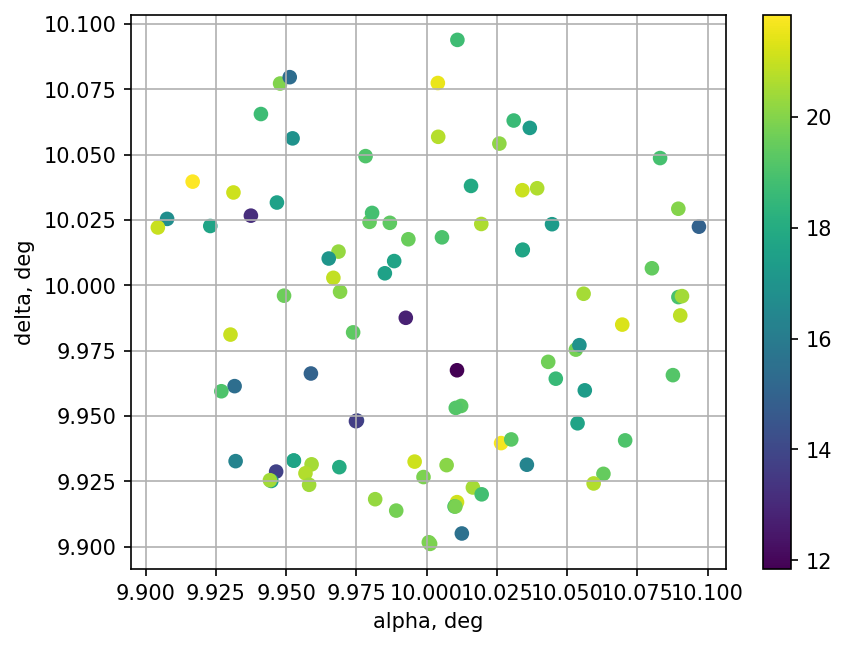

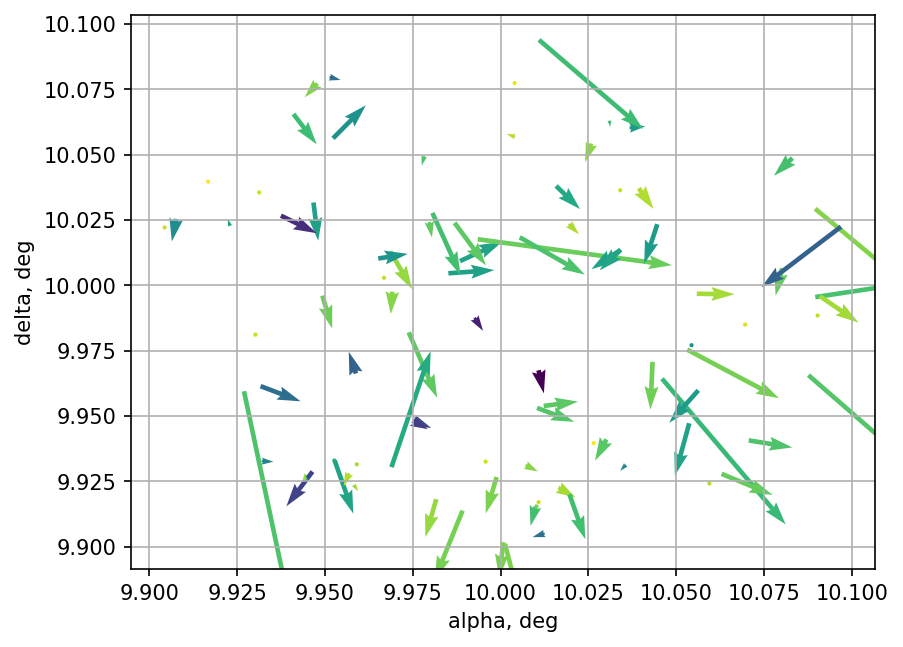

In [34]:
fig1, ax1 = plt.subplots(dpi=150)
ax1.set_xlabel(r"alpha, deg")
ax1.set_ylabel(r"delta, deg")
ax1.grid()

# colors = np.array([np.max(My_Cat['G']), np.min(My_Cat['G'])])
scatter = ax1.scatter(Gaia_tab['RAJ2000'], Gaia_tab['DEJ2000'], c=Gaia_tab['Gmag'], cmap='viridis')
fig1.colorbar(scatter)
plt.savefig(f"result_scatter.png")

fig2, ax2 = plt.subplots(dpi=150)
ax2.set_xlabel(r"alpha, deg")
ax2.set_ylabel(r"delta, deg")
ax2.grid()
ax2.quiver(Gaia_tab['RAJ2000'].filled(0), Gaia_tab['DEJ2000'].filled(0), Gaia_tab['pmRA'].filled(0), Gaia_tab['pmDE'].filled(0), Gaia_tab['Gmag'])
plt.savefig(f"result_quiver.png")


1. Выбрать 100 самых ярких звёзд для области, которую мы запрашивали из Gaia
2. Достать для этих звёзд их потоки в каталогах Gaia, 2MASS, MSX, WISE, PanStarrs в Янских
3. Построить для нескольких звёзд график зависимости потока от длины волны

Длину волн фильтров и формулы перевода в Янские доставать из сайтов каталогов 

In [6]:
Gaia_tab[0]

_r,RAJ2000,DEJ2000,Gmag,BPmag,pmRA,pmDE,RPmag,e_Gmag,e_BPmag,e_RPmag
,deg,deg,mag,mag,mas / yr,mas / yr,mag,mag,mag,mag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.095804,10.05945410301,9.92417556407,20.678057,20.861614,-0.639,-1.452,20.217699,0.010388,0.124852,0.098618
0.095195,10.06293726290,9.92785094164,19.488579,20.785307,17.983,-7.447,18.300808,0.003910,0.095569,0.025077
0.091522,10.07067225463,9.94065866833,19.035713,19.510466,15.391,-2.484,18.442076,0.003472,0.033697,0.021248
0.098387,10.00078581017,9.90167232089,19.844248,20.499269,-1.502,-12.355,19.066639,0.004906,0.122852,0.034208
0.099036,10.00124547914,9.90105059313,19.890486,20.644917,4.487,-17.368,18.830719,0.004824,0.134486,0.066579
0.086980,9.98918243757,9.91379048495,19.765535,21.287773,-9.835,-24.239,18.487906,0.004638,0.140826,0.022352
0.083878,9.98168856429,9.91815029454,20.255646,20.708618,-3.857,-13.352,19.613125,0.005960,0.096518,0.061826
0.094922,9.93201361159,9.93271197877,16.299690,16.734129,4.082,-0.209,15.693999,0.002793,0.004729,0.004423


In [7]:
mags = ('RAJ2000', 'DEJ2000', 'Gmag', 'BPmag',
        'RPmag', 'Jmag', 'Hmag', 'Kmag', 'W1mag', 'W2mag', 'W3mag', 'W4mag',
        'gmag', 'imag', 'rmag', 'ymag', 'zmag')
errs = ('e_Gmag', 'e_BPmag','e_RPmag',
        'e_Jmag','e_Hmag','e_Kmag',
        'e_W1mag', 'e_W2mag', 'e_W3mag', 'e_W4mag',
        'e_gmag', 'e_imag', 'e_rmag', 'e_ymag', 'e_zmag')
result_cat = Table(names=mags+errs)
Tab_List = [Gaia_tab[0], Gaia_tab[1], Gaia_tab[2], Gaia_tab[3]]
for row in Tab_List[0]:
    for cat in Tab_List[1:]:
        for item in cat:
            if np.sqrt((row['RAJ2000']-item['RAJ2000'])**2+(row['DEJ2000']-item['DEJ2000'])**2)<1e-4:
                result_cat.add_row()
                for i, mag in enumerate(mags):
                    try:
                        result_cat[-1][mag] = row[mag]
                        if i >1:
                            result_cat[-1][errs[i-2]] = row[errs[i-2]]
                        continue
                    except: 
                        # result_cat[-1][mag] = np.nan
                        pass
                    try:
                        result_cat[-1][mag] = item[mag]
                        if i > 1:
                            result_cat[-1][errs[i-2]] = item[errs[i-2]]
                    except:
                        result_cat[-1][mag] = np.nan
result_cat
# np.save('result_cat', result_cat)

C:\Users\User\IdeaProjects\Telescopes\venv\lib\site-packages\astropy\table\column.py:1362: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value


RAJ2000,DEJ2000,Gmag,BPmag,RPmag,Jmag,Hmag,Kmag,W1mag,W2mag,W3mag,W4mag,gmag,imag,rmag,ymag,zmag,e_Gmag,e_BPmag,e_RPmag,e_Jmag,e_Hmag,e_Kmag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_gmag,e_imag,e_rmag,e_ymag,e_zmag
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10.05945410301,9.92417556407,20.678057,20.861614,20.217699,nan,nan,nan,nan,nan,nan,nan,20.8416,20.6425,20.3735,19.9568,20.5264,0.010388,0.124852,0.098618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048900000751018524,0.04349999874830246,0.03189999982714653,0.011500000022351742,0.06270000338554382
10.0629372629,9.92785094164,19.488579,20.785307,18.300808,16.732999801635742,15.845999717712402,15.680999755859375,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00391,0.095569,0.025077,0.14399999380111694,0.164000004529953,0.23499999940395355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0629372629,9.92785094164,19.488579,20.785307,18.300808,nan,nan,nan,nan,nan,nan,nan,21.4043,18.7718,20.0491,17.8949,18.1806,0.00391,0.095569,0.025077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05480000004172325,0.00860000029206276,0.011900000274181366,0.018200000748038292,0.013299999758601189
10.07067225463,9.94065866833,19.035713,19.510466,18.442076,nan,nan,nan,nan,nan,nan,nan,19.556,18.7636,19.0201,18.5703,18.6488,0.003472,0.033697,0.021248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009399999864399433,0.00430000014603138,0.006800000090152025,0.0333000011742115,0.020800000056624413
10.00078581017,9.90167232089,19.844248,20.499269,19.066639,nan,nan,nan,nan,nan,nan,nan,20.6544,19.4012,19.7633,18.961,19.1617,0.004906,0.122852,0.034208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.029200000688433647,0.02070000022649765,0.02630000002682209,0.06289999932050705,0.028999999165534973
10.00124547914,9.90105059313,19.890486,20.644917,18.830719,nan,nan,nan,nan,nan,nan,nan,21.2453,19.2052,20.1362,18.4687,18.7382,0.004824,0.134486,0.066579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10249999910593033,0.009600000455975533,0.0,0.023800000548362732,0.016599999740719795
9.98918243757,9.91379048495,19.765535,21.287773,18.487906,16.64900016784668,15.857000350952148,15.690999984741211,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.004638,0.140826,0.022352,0.164000004529953,0.15299999713897705,0.22699999809265137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.98168856429,9.91815029454,20.255646,20.708618,19.613125,nan,nan,nan,nan,nan,nan,nan,20.7094,19.8586,20.2218,19.5659,19.7262,0.00596,0.096518,0.061826,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048900000751018524,0.03359999880194664,0.028300000354647636,0.062300000339746475,0.02969999983906746
9.93201361159,9.93271197877,16.29969,16.734129,15.693999,14.961999893188477,14.656000137329102,14.538999557495117,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.002793,0.004729,0.004423,0.03999999910593033,0.05400000140070915,0.09300000220537186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
np.save('result_cat.npy', result_cat)

In [77]:
result_cat = np.load('result_cat.npy')
result_cat = Table(result_cat)

In [6]:
# G BP RP J H Ks W1-W4 g r i z y
ZP = [3229, 3552, 2555, 1594, 1024, 666.7, 309.54, 171.79, 31.676, 8.3635, 3964.03, 3173.02, 2575.36, 2261.81, 2180.4]
wl = [622, 511, 777, 1235, 1662, 2159, 3368, 4618, 12082, 22194, 481, 617, 752, 866, 962]
mags = ('Gmag', 'BPmag',  'RPmag', 
        'Jmag', 'Hmag',  'Kmag', 
        'W1mag', 'W2mag', 'W3mag', 'W4mag',
        'gmag', 'imag', 'rmag', 'ymag', 'zmag')
errs = ('e_Gmag', 'e_BPmag','e_RPmag',
        'e_Jmag','e_Hmag','e_Kmag',
        'e_W1mag', 'e_W2mag', 'e_W3mag', 'e_W4mag',
        'e_gmag', 'e_imag', 'e_rmag', 'e_ymag', 'e_zmag')


In [10]:
for mag in mags:
    result_cat.add_column(col=np.nan, name=mag+'_WL')
    result_cat.add_column(col=np.nan, name=mag+'_Flux')
    result_cat.add_column(col=np.nan, name='e_' + mag + '_Flux')

In [17]:
# result_cat = Table(result_cat)
result_cat

RAJ2000,DEJ2000,Gmag,BPmag,RPmag,Jmag,Hmag,Kmag,W1mag,W2mag,W3mag,W4mag,gmag,imag,rmag,ymag,zmag,Gmag_WL,Gmag_Flux,BPmag_WL,BPmag_Flux,RPmag_WL,RPmag_Flux,Jmag_WL,Jmag_Flux,Hmag_WL,Hmag_Flux,Kmag_WL,Kmag_Flux,W1mag_WL,W1mag_Flux,W2mag_WL,W2mag_Flux,W3mag_WL,W3mag_Flux,W4mag_WL,W4mag_Flux,gmag_WL,gmag_Flux,imag_WL,imag_Flux,rmag_WL,rmag_Flux,ymag_WL,ymag_Flux,zmag_WL,zmag_Flux
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10.05945410301,9.92417556407,20.678057,20.861614,20.217699,nan,nan,nan,nan,nan,nan,nan,20.8416,20.6425,20.3735,19.9568,20.5264,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10.0629372629,9.92785094164,19.488579,20.785307,18.300808,16.732999801635742,15.845999717712402,15.680999755859375,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10.0629372629,9.92785094164,19.488579,20.785307,18.300808,nan,nan,nan,nan,nan,nan,nan,21.4043,18.7718,20.0491,17.8949,18.1806,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10.07067225463,9.94065866833,19.035713,19.510466,18.442076,nan,nan,nan,nan,nan,nan,nan,19.556,18.7636,19.0201,18.5703,18.6488,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10.00078581017,9.90167232089,19.844248,20.499269,19.066639,nan,nan,nan,nan,nan,nan,nan,20.6544,19.4012,19.7633,18.961,19.1617,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
10.00124547914,9.90105059313,19.890486,20.644917,18.830719,nan,nan,nan,nan,nan,nan,nan,21.2453,19.2052,20.1362,18.4687,18.7382,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9.98918243757,9.91379048495,19.765535,21.287773,18.487906,16.64900016784668,15.857000350952148,15.690999984741211,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9.98168856429,9.91815029454,20.255646,20.708618,19.613125,nan,nan,nan,nan,nan,nan,nan,20.7094,19.8586,20.2218,19.5659,19.7262,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9.93201361159,9.93271197877,16.29969,16.734129,15.693999,14.961999893188477,14.656000137329102,14.538999557495117,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [11]:
for row in result_cat:
    for i, mag in enumerate(mags):
        row[mag+'_WL'] = wl[i]
        row[mag+'_Flux'] = ZP[i]*10**(-0.4*row[mag])
        row['e_' + mag + '_Flux'] = row['e_' + mag]*0.4*row[mag+'_Flux']*np.log(10)
result_cat

RAJ2000,DEJ2000,Gmag,BPmag,RPmag,Jmag,Hmag,Kmag,W1mag,W2mag,W3mag,W4mag,gmag,imag,rmag,ymag,zmag,e_Gmag,e_BPmag,e_RPmag,e_Jmag,e_Hmag,e_Kmag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_gmag,e_imag,e_rmag,e_ymag,e_zmag,Gmag_WL,Gmag_Flux,e_Gmag_Flux,BPmag_WL,BPmag_Flux,e_BPmag_Flux,RPmag_WL,RPmag_Flux,e_RPmag_Flux,Jmag_WL,Jmag_Flux,e_Jmag_Flux,Hmag_WL,Hmag_Flux,e_Hmag_Flux,Kmag_WL,Kmag_Flux,e_Kmag_Flux,W1mag_WL,W1mag_Flux,e_W1mag_Flux,W2mag_WL,W2mag_Flux,e_W2mag_Flux,W3mag_WL,W3mag_Flux,e_W3mag_Flux,W4mag_WL,W4mag_Flux,e_W4mag_Flux,gmag_WL,gmag_Flux,e_gmag_Flux,imag_WL,imag_Flux,e_imag_Flux,rmag_WL,rmag_Flux,e_rmag_Flux,ymag_WL,ymag_Flux,e_ymag_Flux,zmag_WL,zmag_Flux,e_zmag_Flux
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
10.05945410301,9.92417556407,20.678057,20.861614,20.217699,nan,nan,nan,nan,nan,nan,nan,20.8416,20.6425,20.3735,19.9568,20.5264,0.010388,0.124852,0.098618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048900000751018524,0.04349999874830246,0.03189999982714653,0.011500000022351742,0.06270000338554382,622.0,1.7292000722886753e-05,1.6544470261021073e-07,511.0,1.6063025807195575e-05,1.8471345887620554e-06,777.0,2.090794285715824e-05,1.8990796287819865e-06,1235.0,nan,nan,1662.0,nan,nan,2159.0,nan,nan,3368.0,nan,nan,4618.0,nan,nan,12082.0,nan,nan,22194.0,nan,nan,481.0,1.8259838521578072e-05,8.223969261645451e-07,617.0,1.7557909635437183e-05,7.034572889963366e-07,752.0,1.825735861004234e-05,5.364191909159434e-07,866.0,2.3536187753178283e-05,2.492927457898686e-07,962.0,1.3426912952109859e-05,7.753886108479123e-07
10.0629372629,9.92785094164,19.488579,20.785307,18.300808,16.732999801635742,15.845999717712402,15.680999755859375,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00391,0.095569,0.025077,0.14399999380111694,0.164000004529953,0.23499999940395355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,622.0,5.1717371615228484e-05,1.8624682692661155e-07,511.0,1.7232574198078977e-05,1.5168508485936427e-06,777.0,0.00012219901478432651,2.8224026060079776e-06,1235.0,0.0003230638738684143,4.284760481463365e-05,1662.0,0.0004697859991829599,7.096098081326974e-05,2159.0,0.0003560660385359609,7.706800093523583e-05,3368.0,nan,nan,4618.0,nan,nan,12082.0,nan,nan,22194.0,nan,nan,481.0,nan,nan,617.0,nan,nan,752.0,nan,nan,866.0,nan,nan,962.0,nan,nan
10.0629372629,9.92785094164,19.488579,20.785307,18.300808,nan,nan,nan,nan,nan,nan,nan,21.4043,18.7718,20.0491,17.8949,18.1806,0.00391,0.095569,0.025077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05480000004172325,0.00860000029206276,0.011900000274181366,0.018200000748038292,0.013299999758601189,622.0,5.1717371615228484e-05,1.8624682692661155e-07,511.0,1.7232574198078977e-05,1.5168508485936427e-06,777.0,0.00012219901478432651,2.8224026060079776e-06,1235.0,nan,nan,1662.0,nan,nan,2159.0,nan,nan,3368.0,nan,nan,4618.0,nan,nan,12082.0,nan,nan,22194.0,nan,nan,481.0,1.087469117760097e-05,5.488746477962548e-07,617.0,9.834511885419429e-05,7.78981162424652e-07,752.0,2.4614892647486783e-05,2.6978673822458656e-07,866.0,0.0001572157746176992,2.635379757169437e-06,962.0,0.00011649201926304681,1.4269984009814213e-06
10.07067225463,9.94065866833,19.035713,19.510466,18.442076,nan,nan,nan,nan,nan,nan,nan,19.556,18.7636,19.0201,18.5703,18.6488,0.003472,0.033697,0.021248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009399999864399433,0.00430000014603138,0.006800000090152025,0.0333000011742115,0.020800000056624413,622.0,7.848431009399715e-05,2.509794952513927e-07,511.0,5.575535137313943e-05,1.730427765959245e-06,777.0,0.000107

In [12]:
np.save('result_cat2.npy', result_cat)

In [8]:
result_cat = np.load('result_cat2.npy')

In [4]:
colors = ('go', 'bo', 'ro',
        'b*', 'g*', 'r*',
        'bx', 'gx', 'yx', 'rx',
        'bp', 'cp', 'gp', 'yp', 'rp')
# names = ('Gaia', 'Gaia', 'Gaia',
#         '2mass', '2mass', '2mass',
#         'Wise', 'Wise', 'Wise', 'Wise',
#         'Pan-Starrs', 'Pan-Starrs', 'Pan-Starrs', 'Pan-Starrs', 'Pan-Starrs')

In [126]:
def func(w, T, omega):
    b = models.BlackBody(temperature=T*u.K)
    f = b(w*u.nm).to(u.Jy/u.sr) * np.pi *u.sr * omega
    return f.value

C:\Users\User\IdeaProjects\Telescopes\venv\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\User\AppData\Local\Temp\ipykernel_18076\1808142068.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')


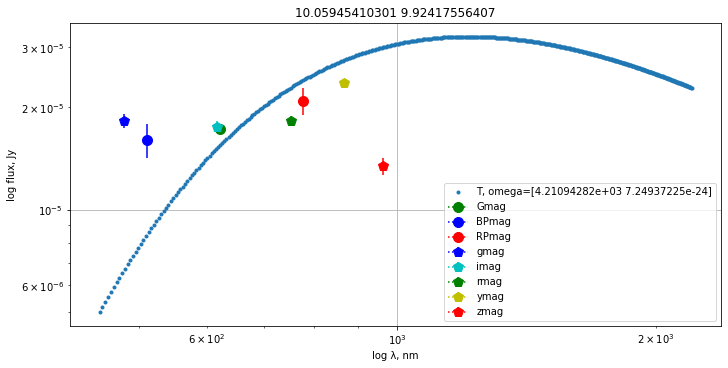

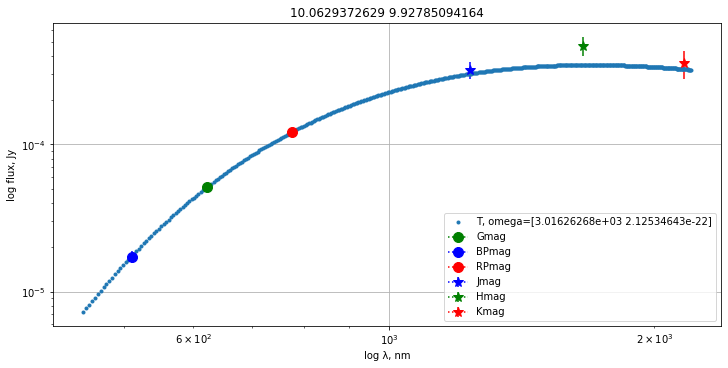

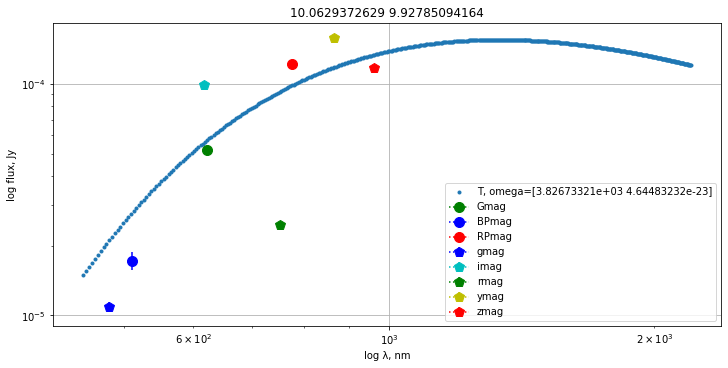

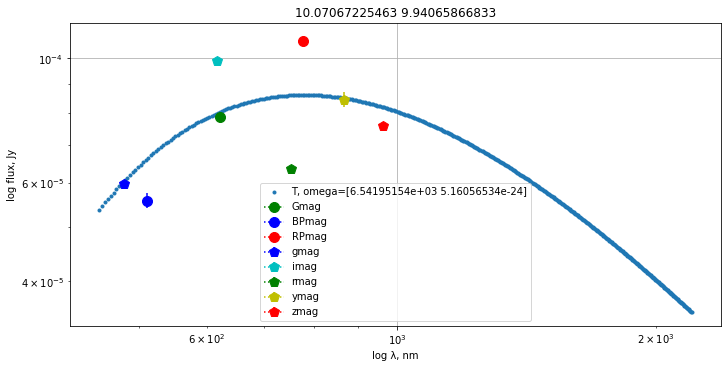

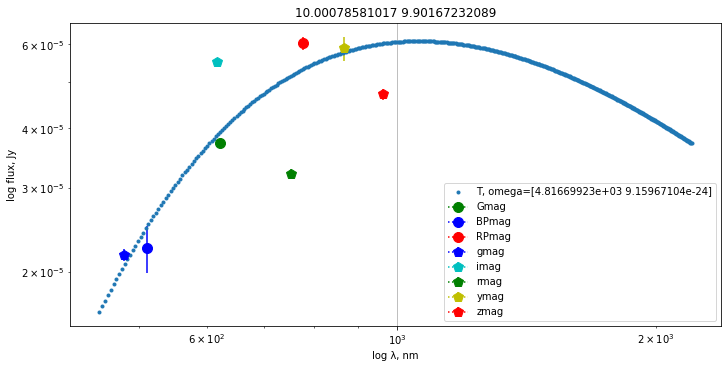

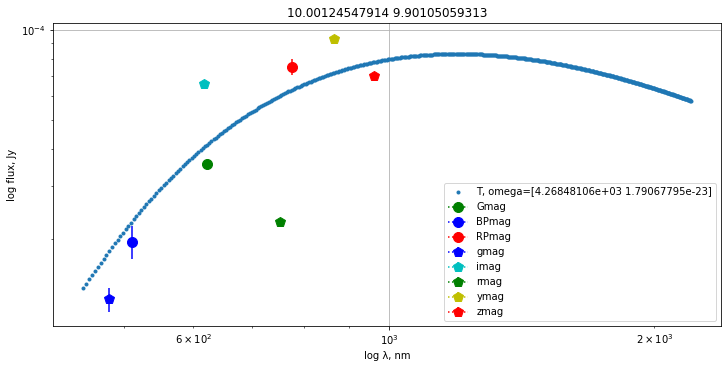

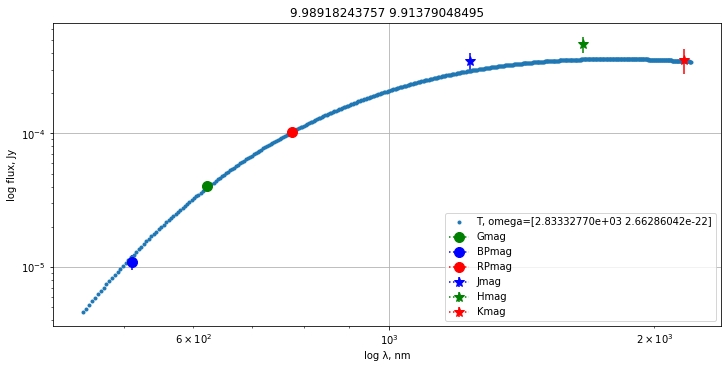

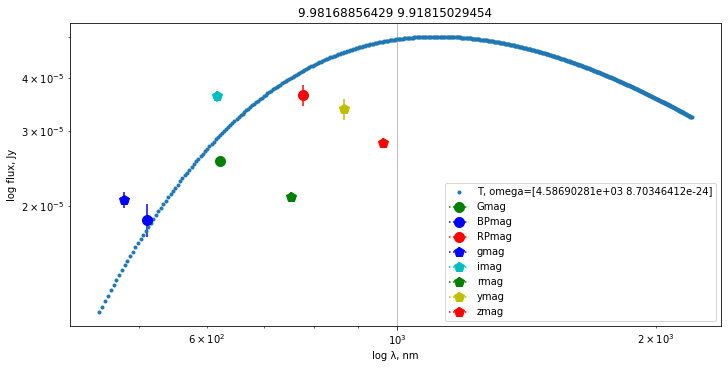

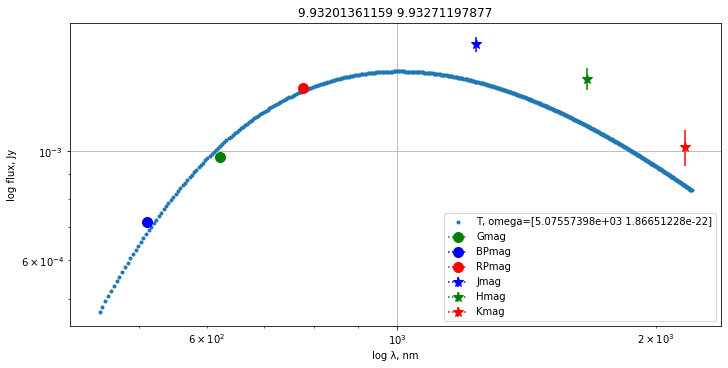

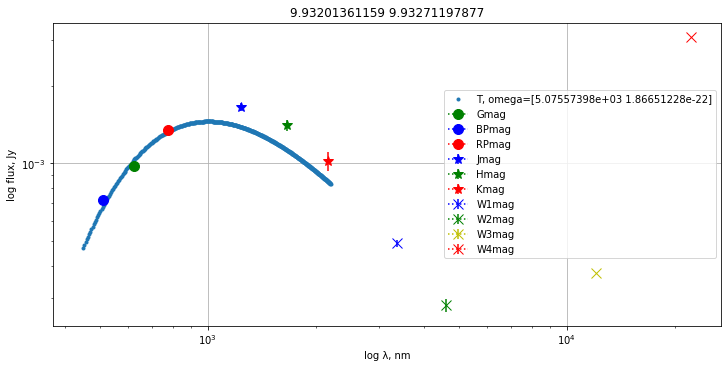

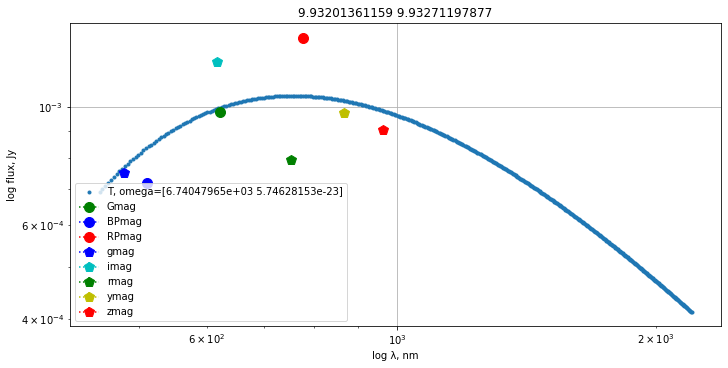

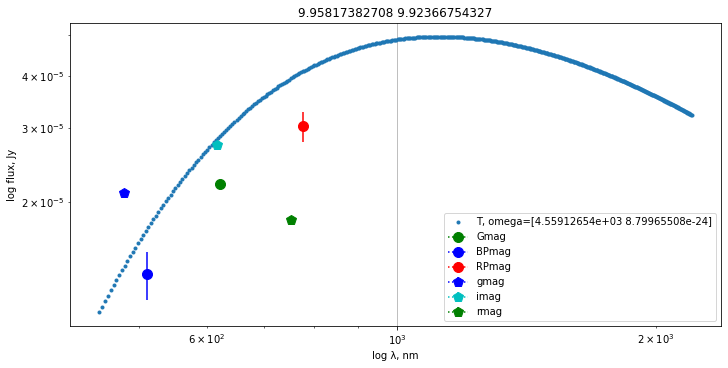

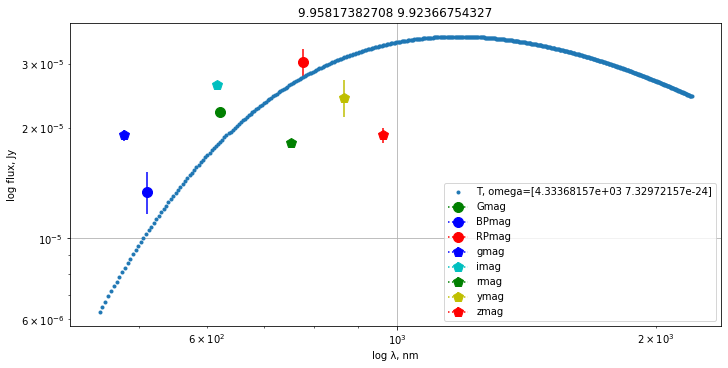

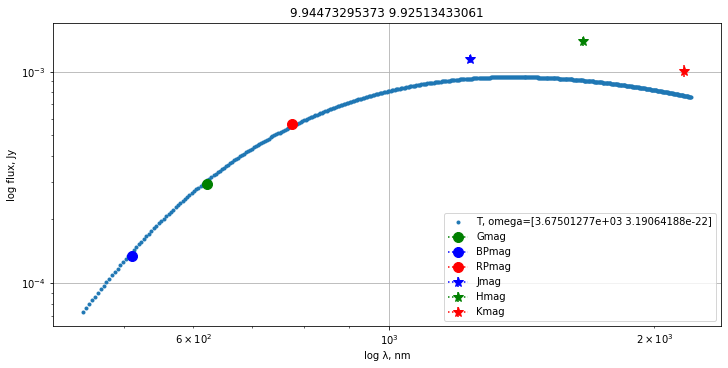

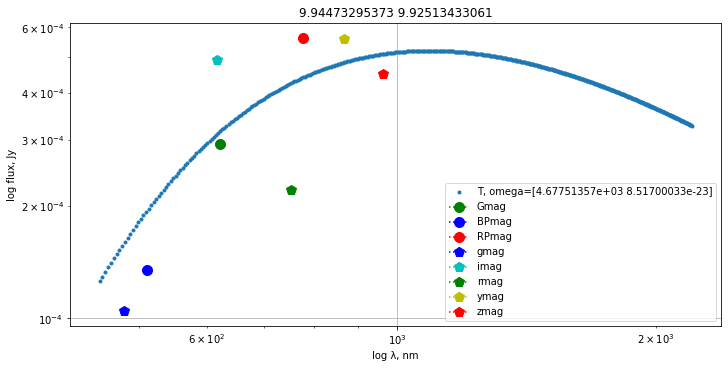

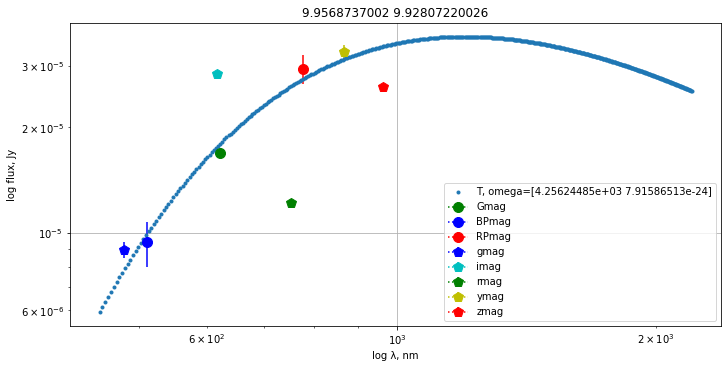

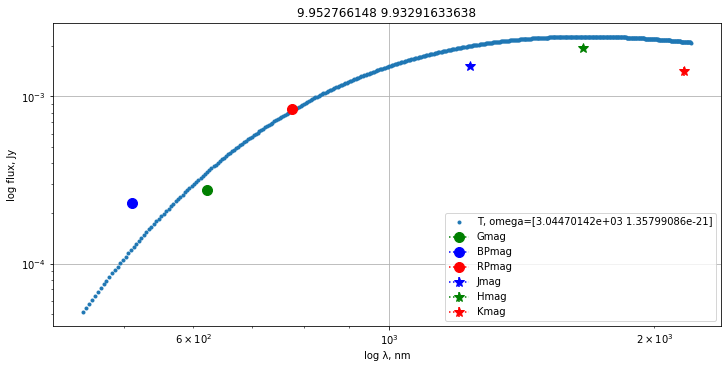

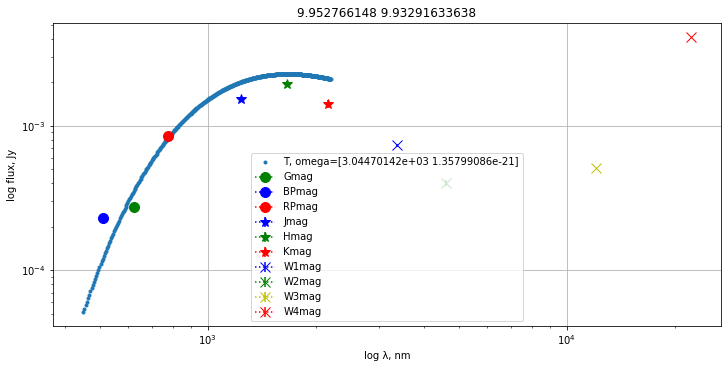

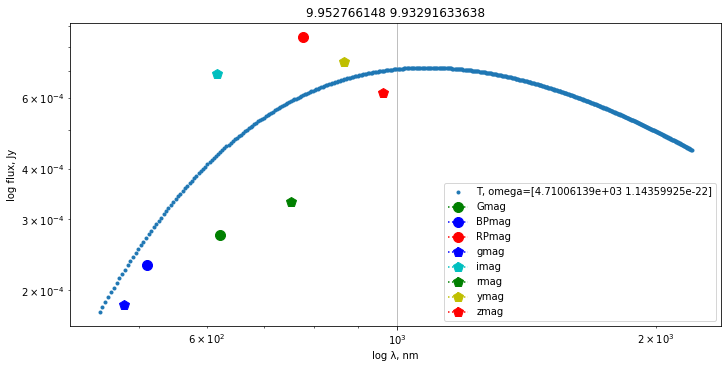

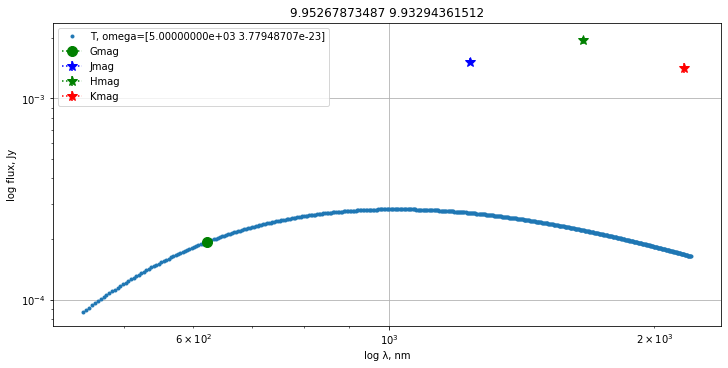

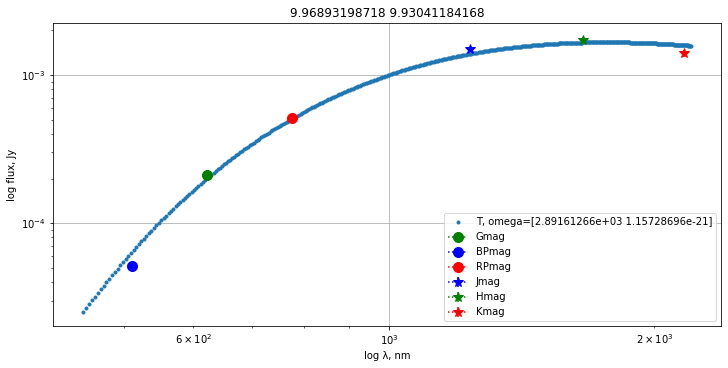

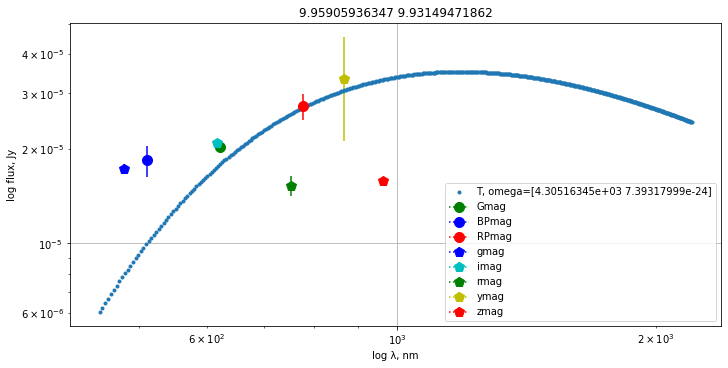

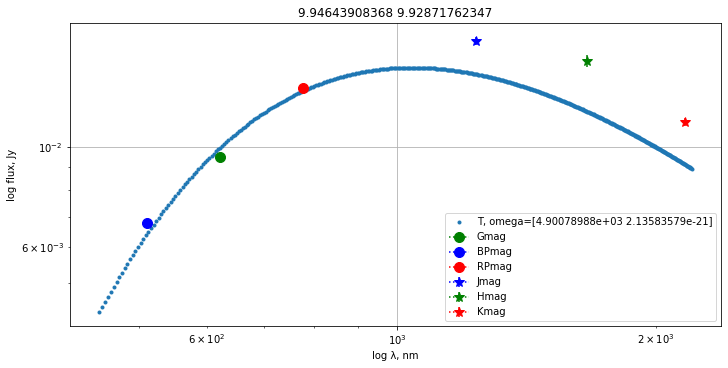

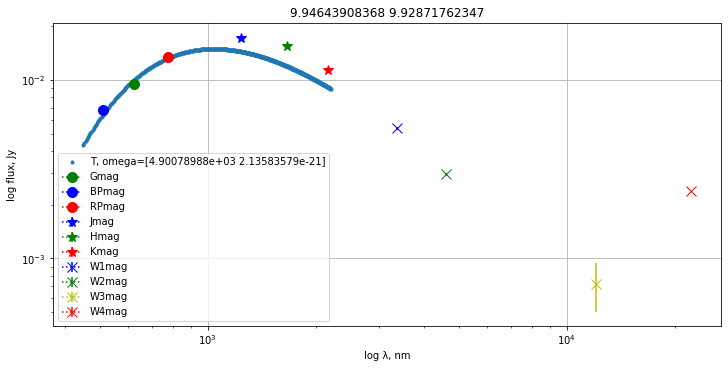

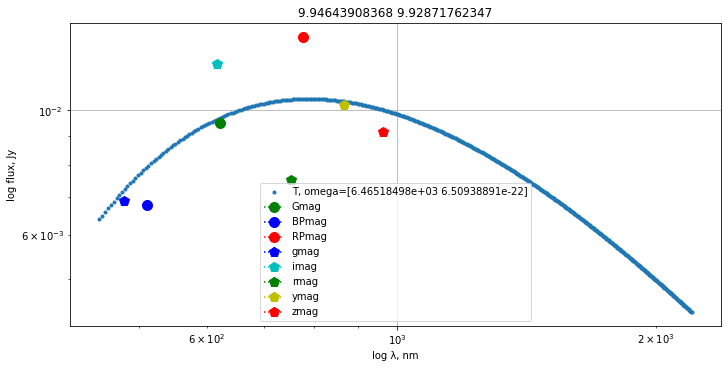

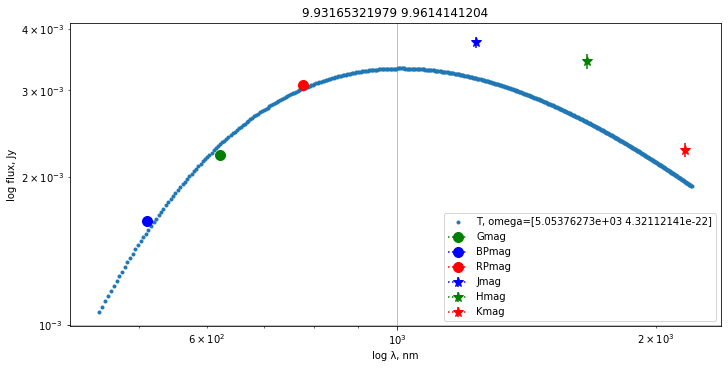

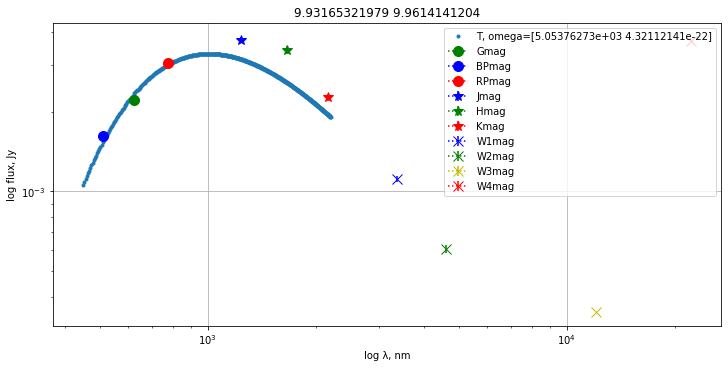

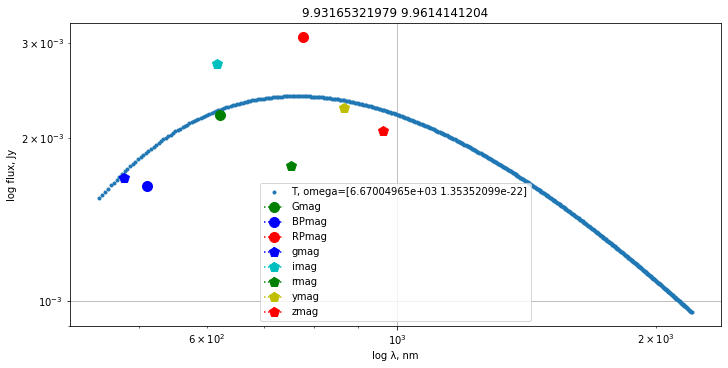

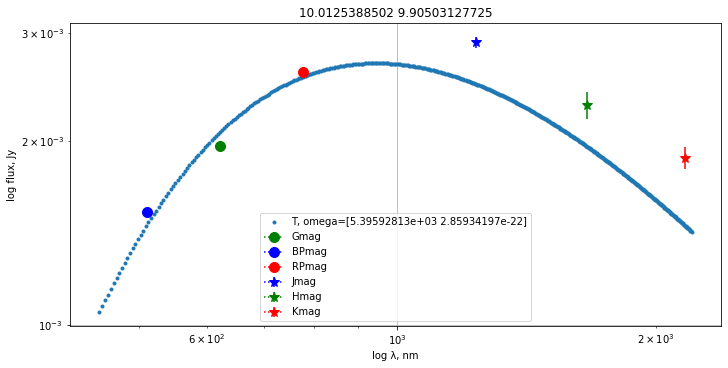

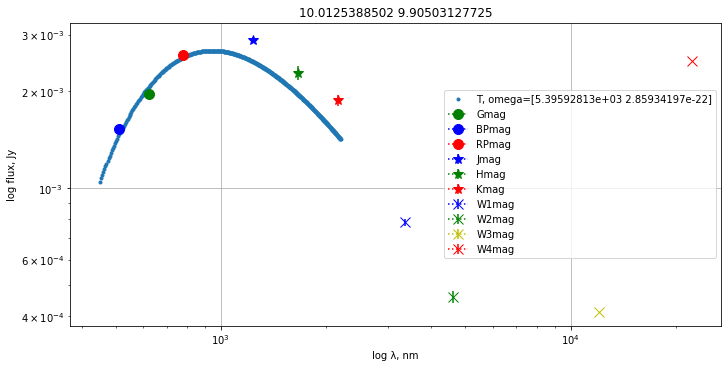

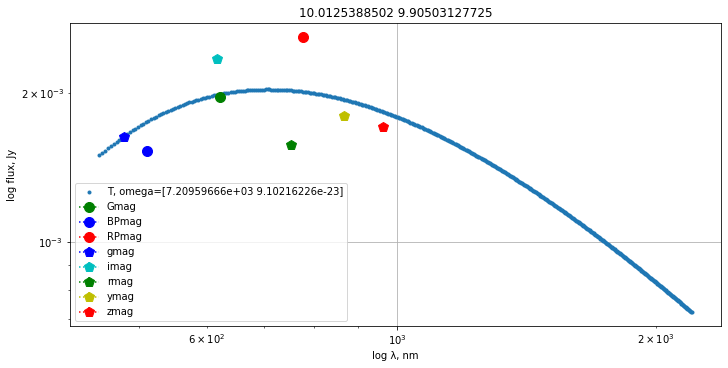

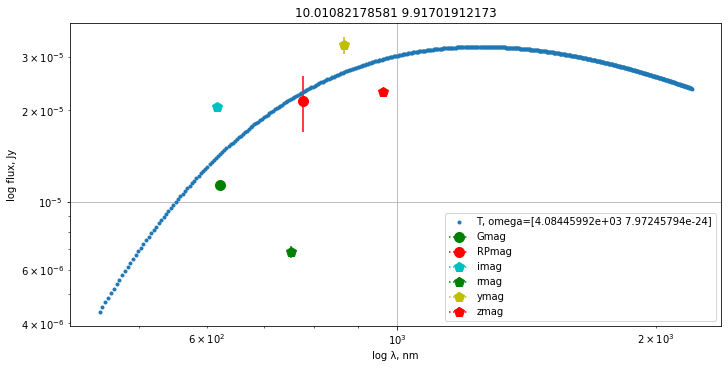

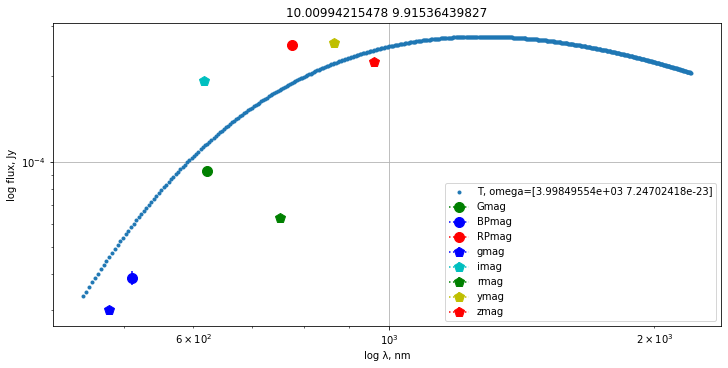

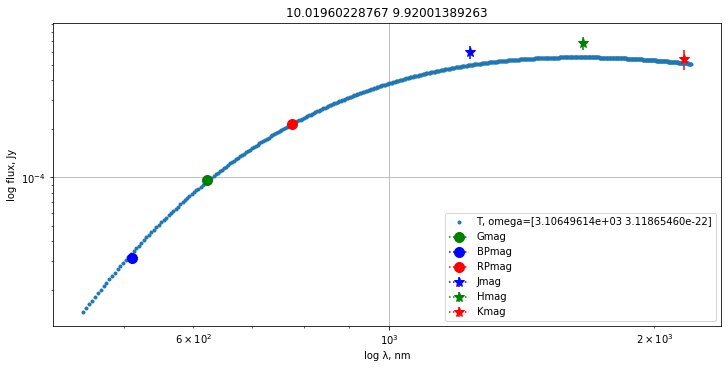

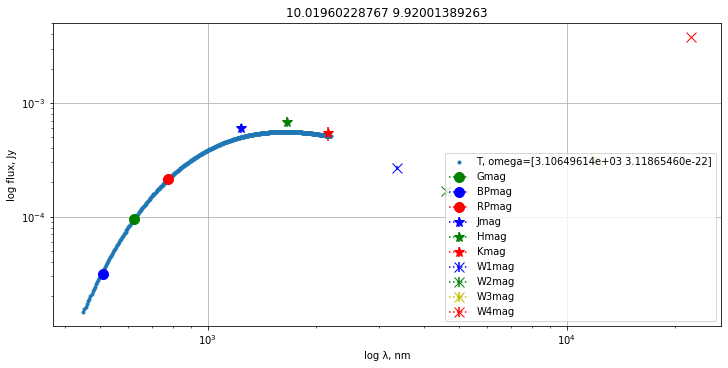

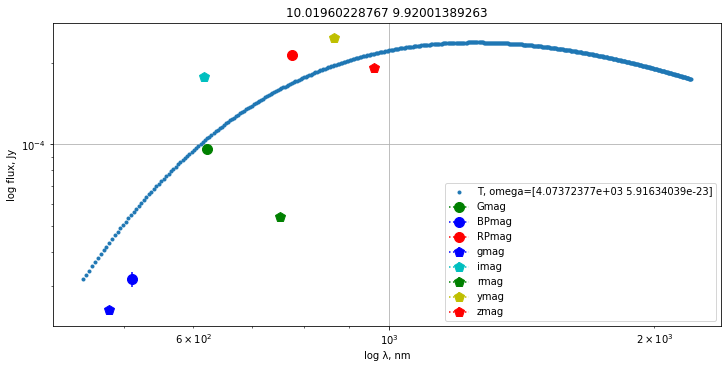

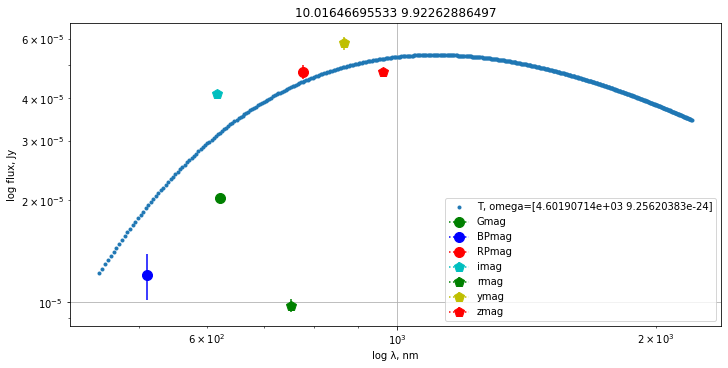

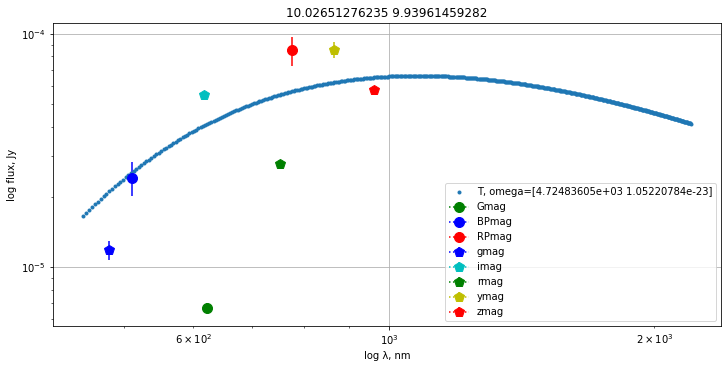

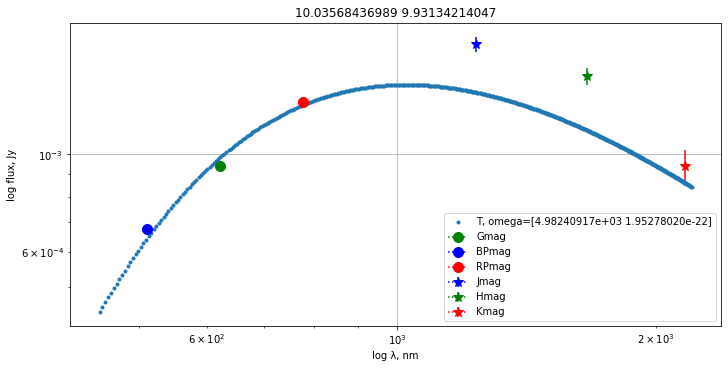

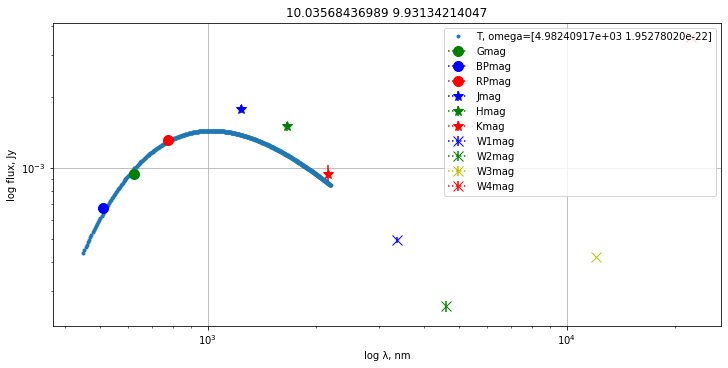

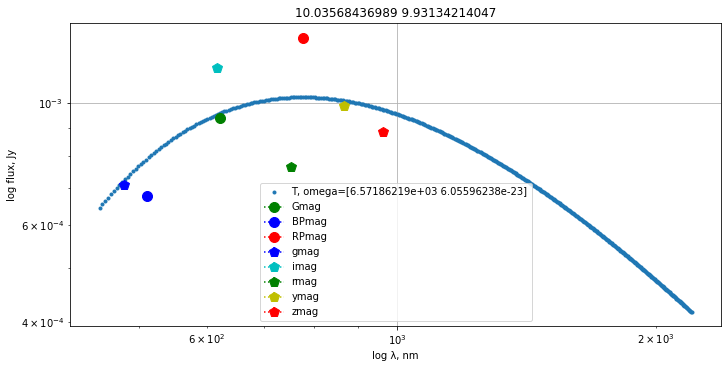

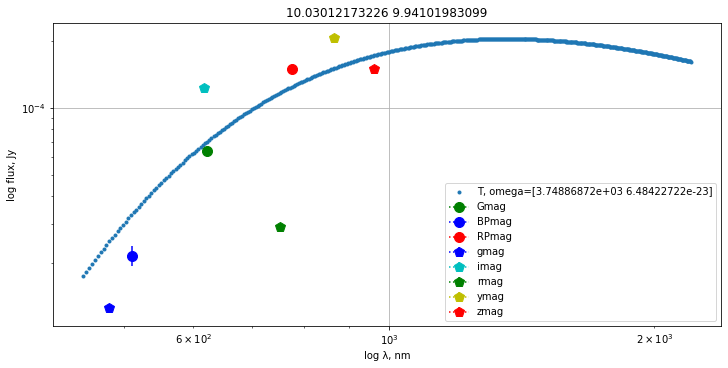

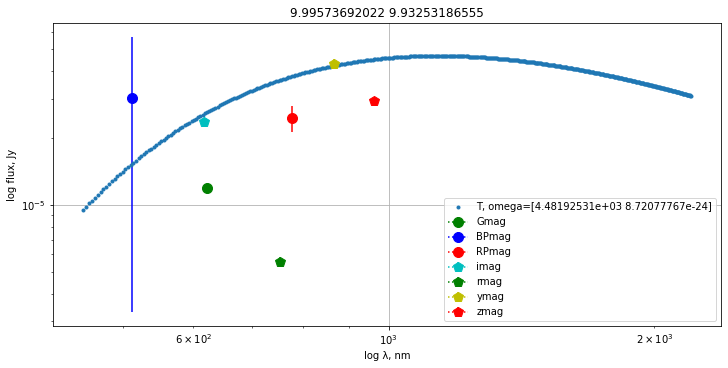

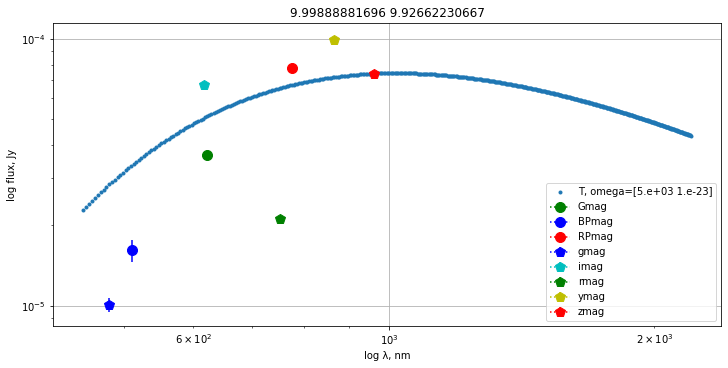

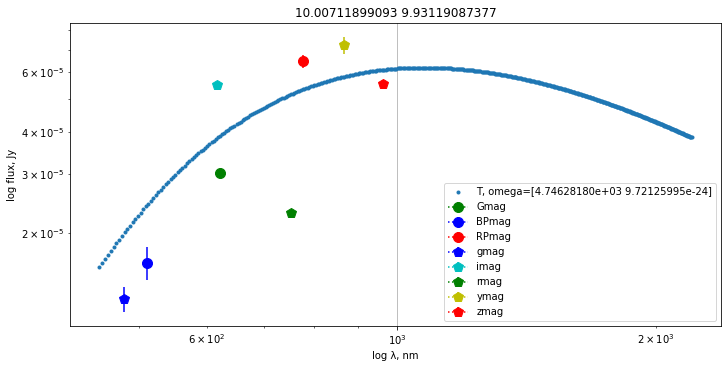

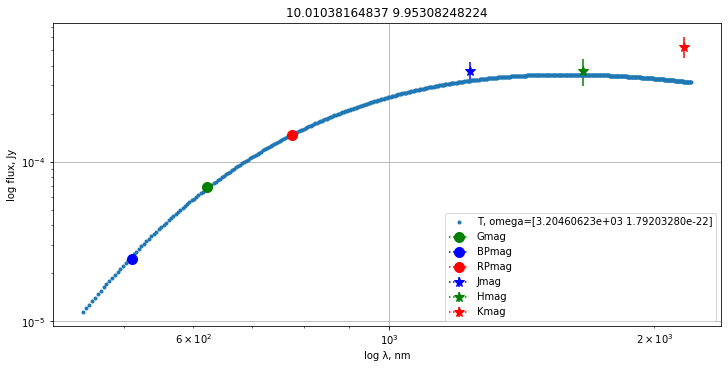

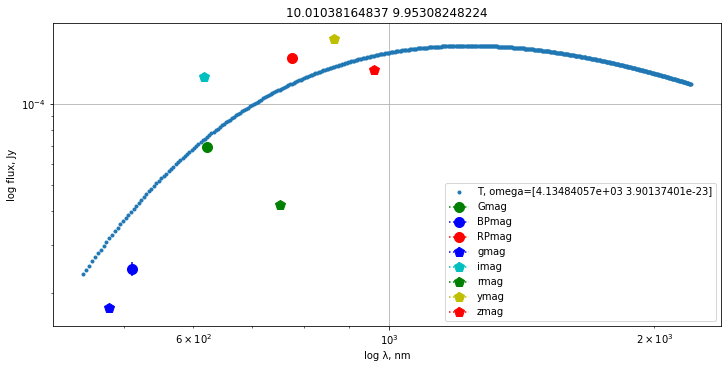

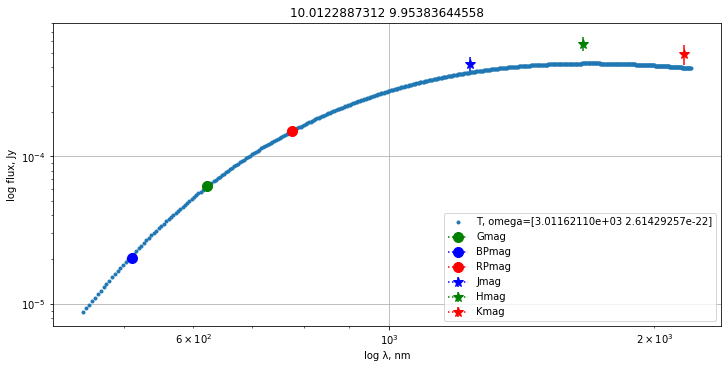

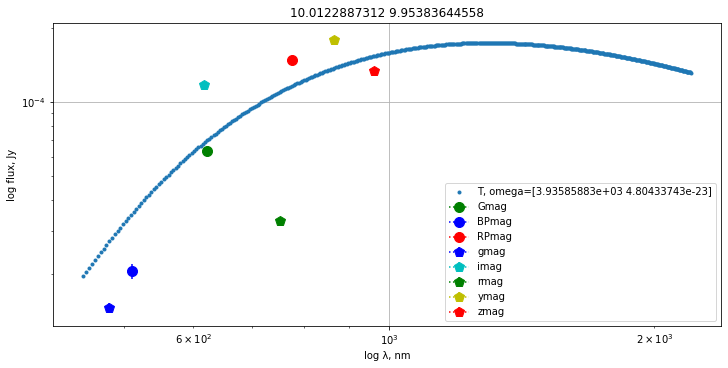

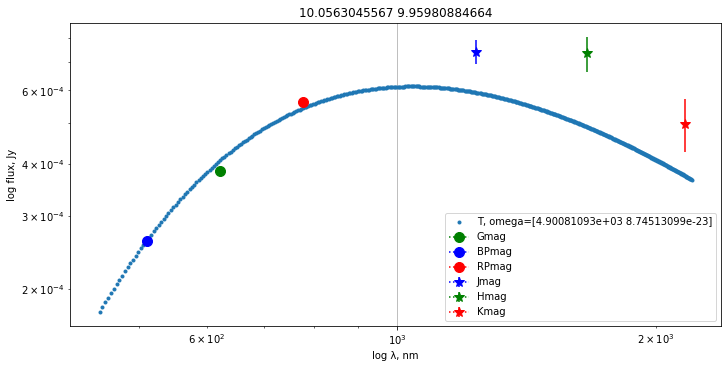

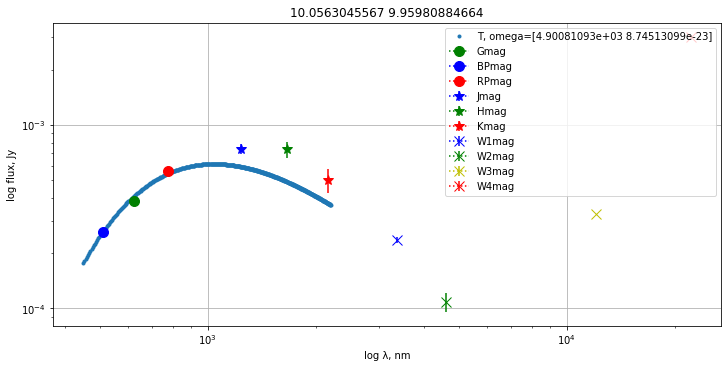

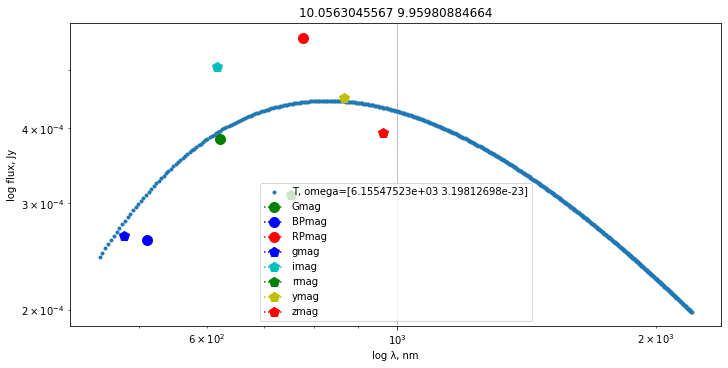

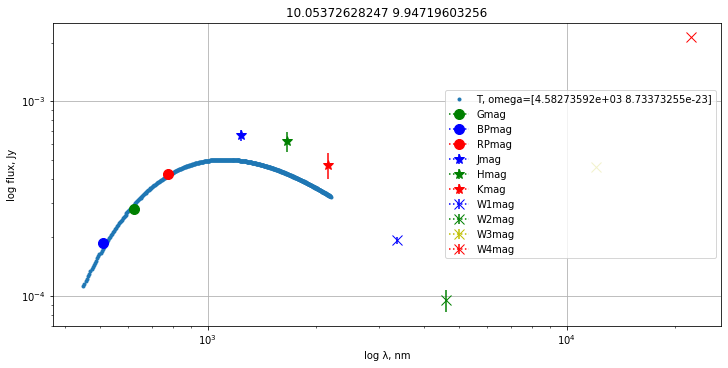

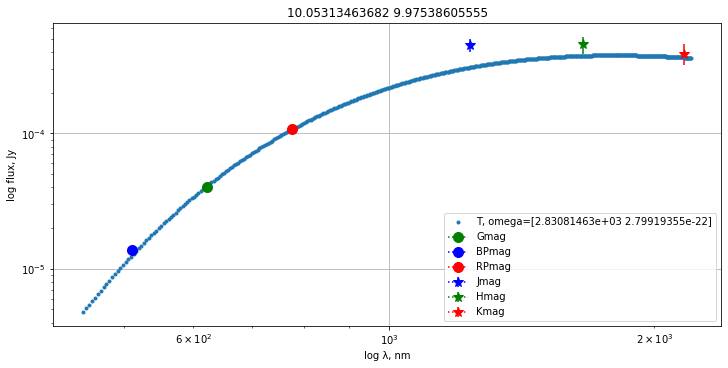

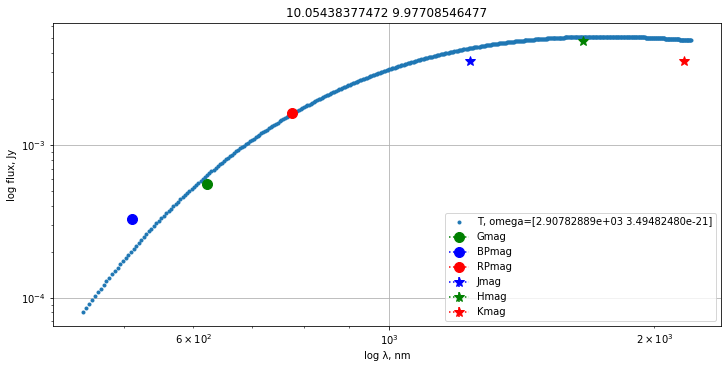

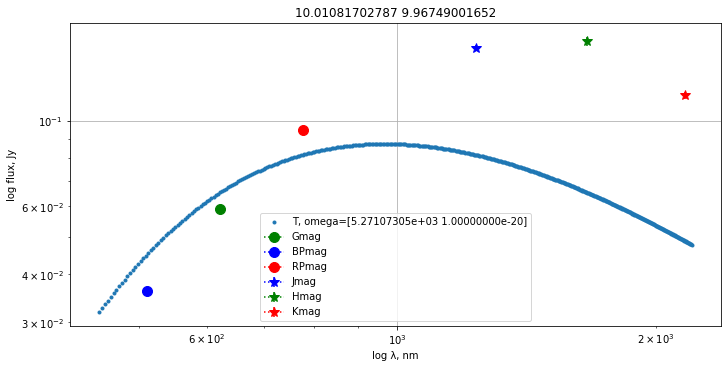

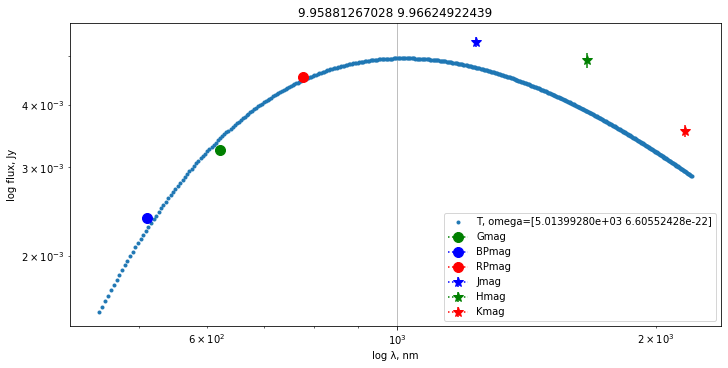

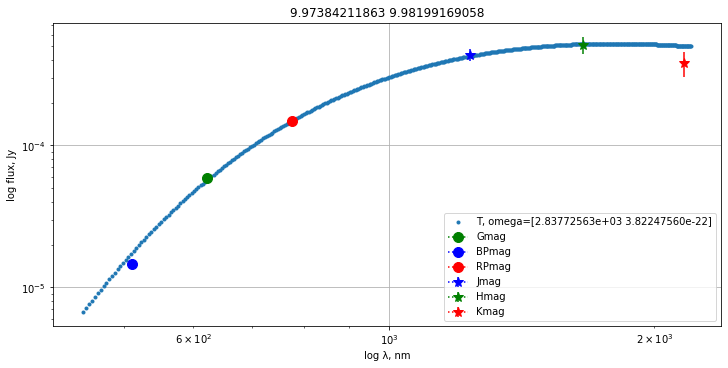

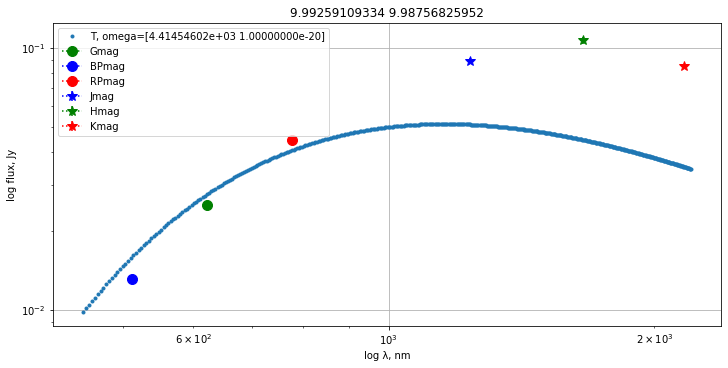

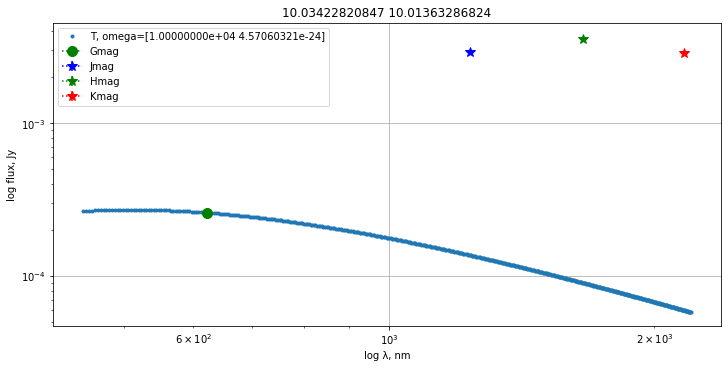

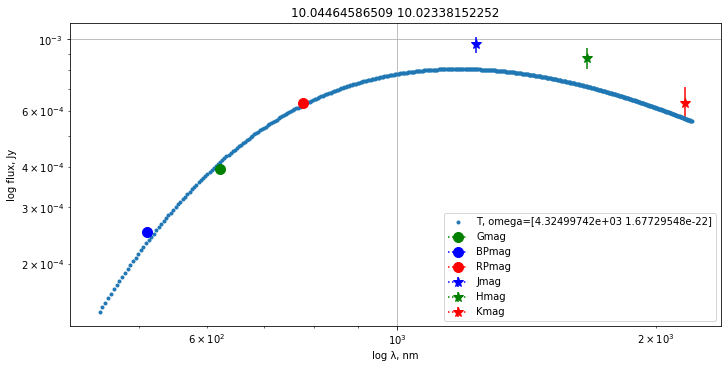

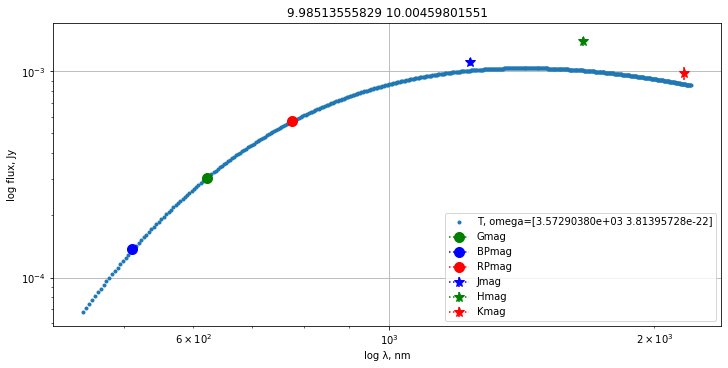

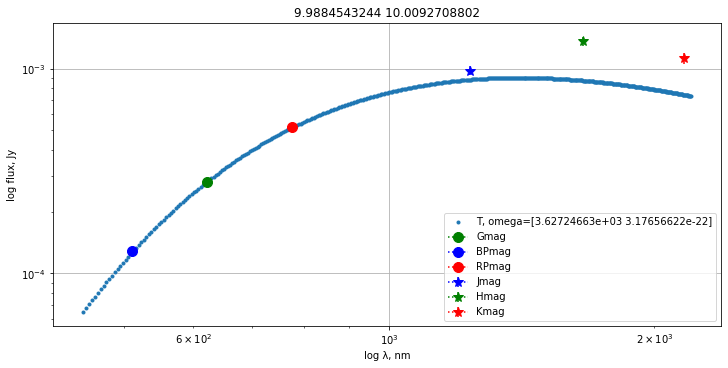

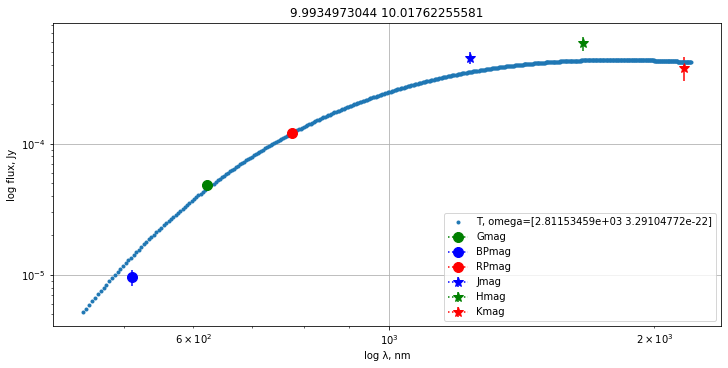

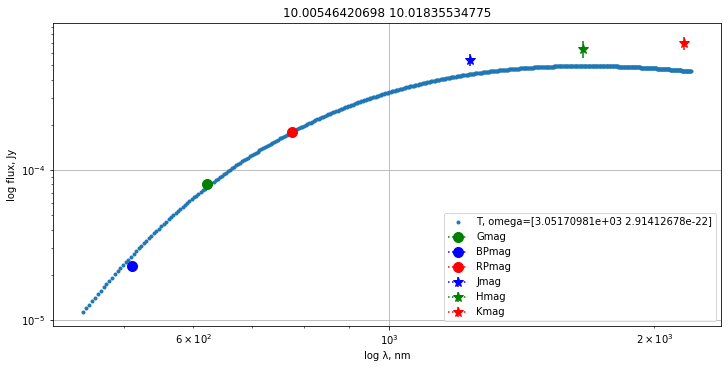

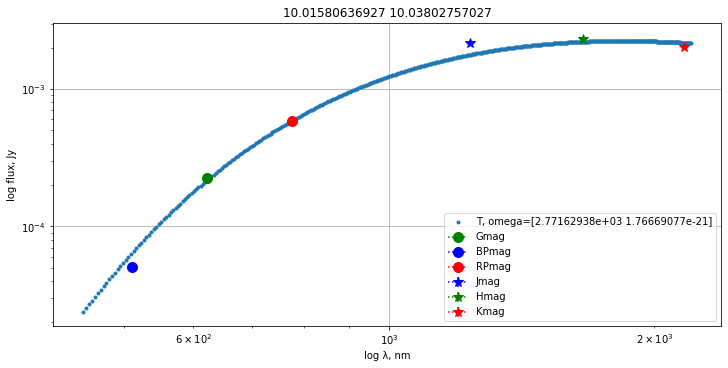

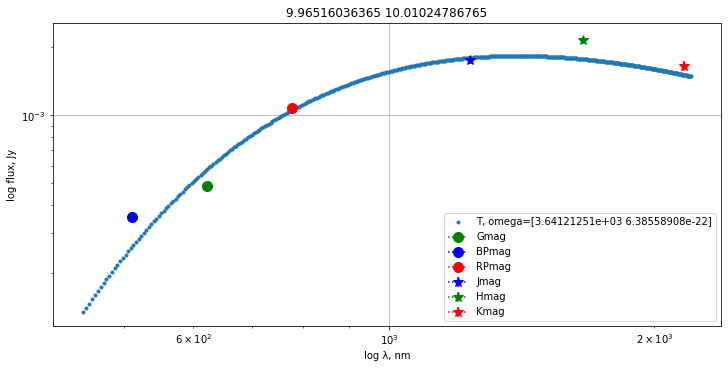

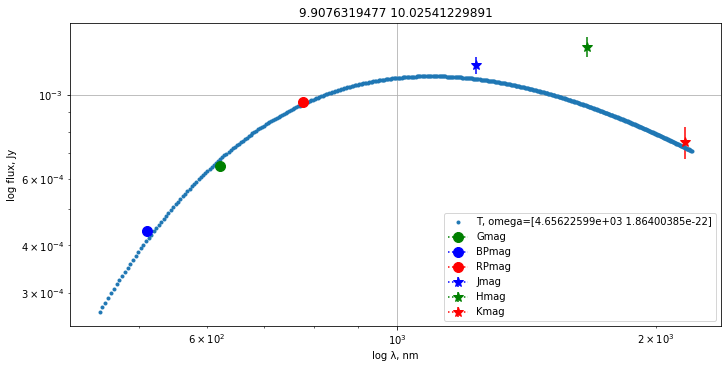

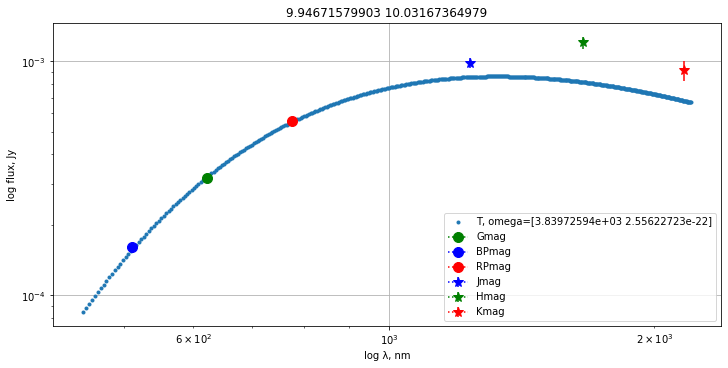

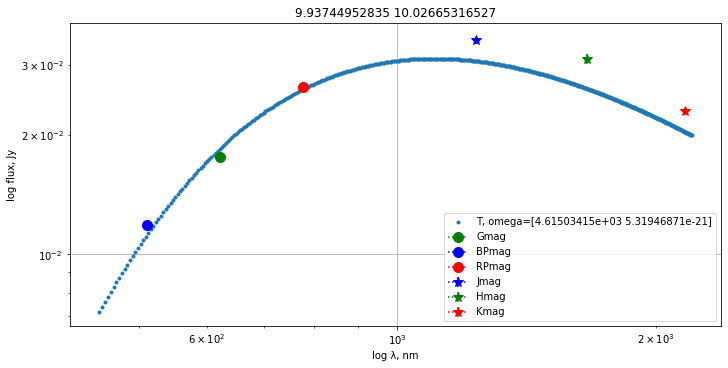

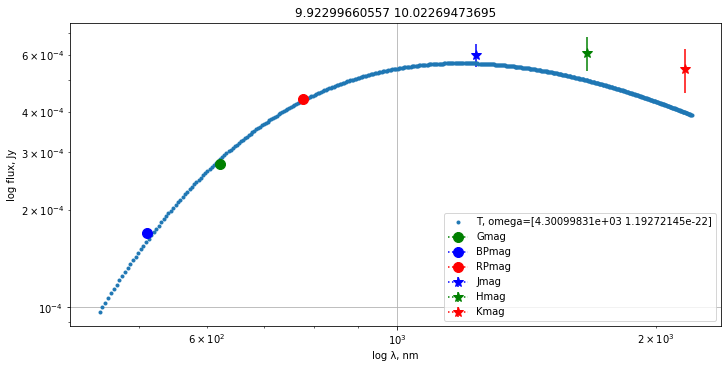

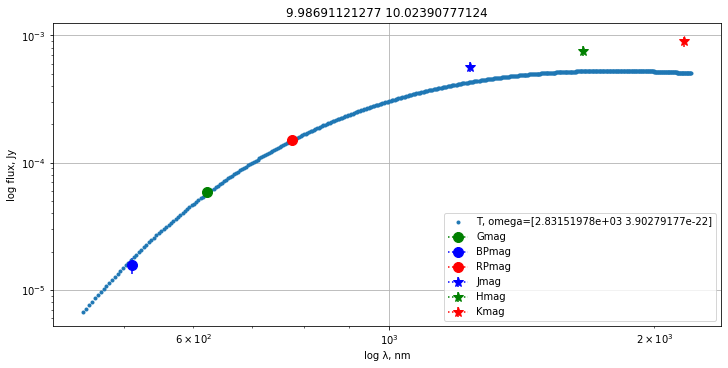

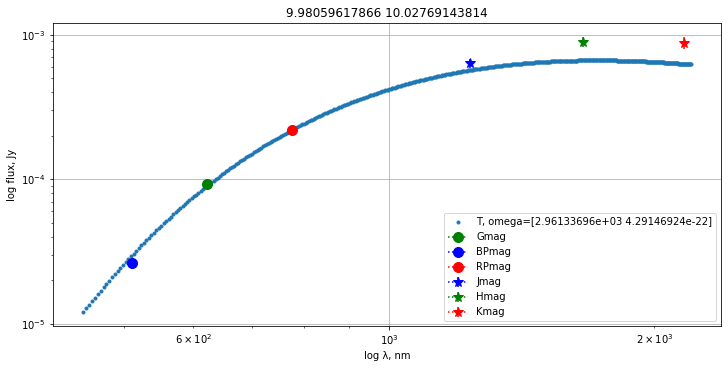

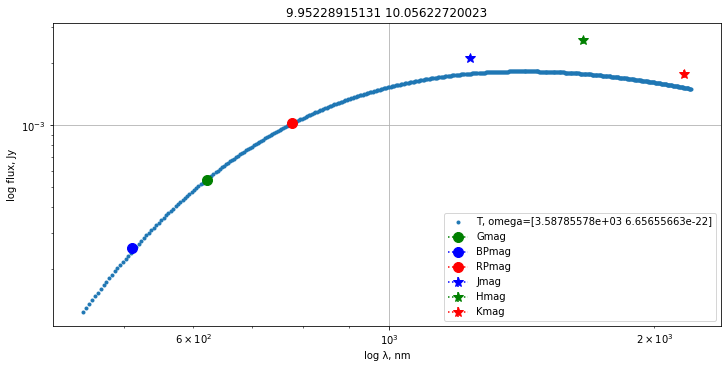

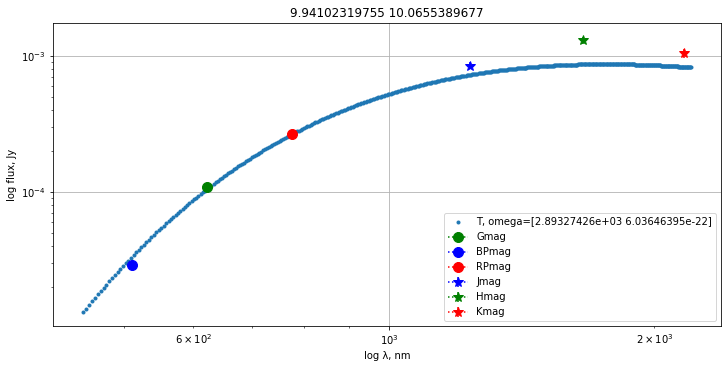

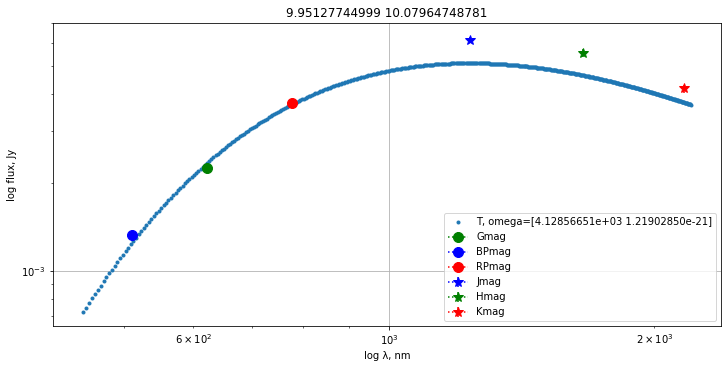

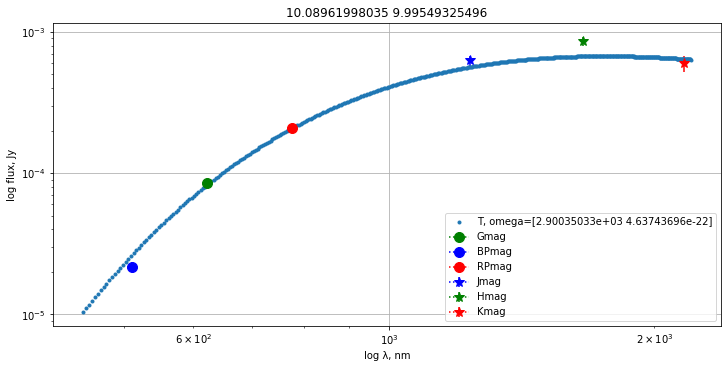

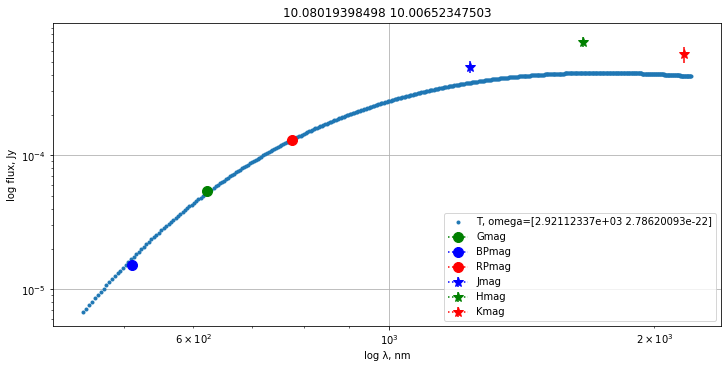

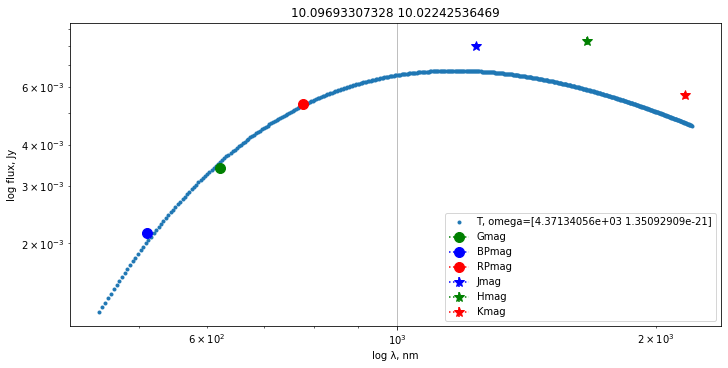

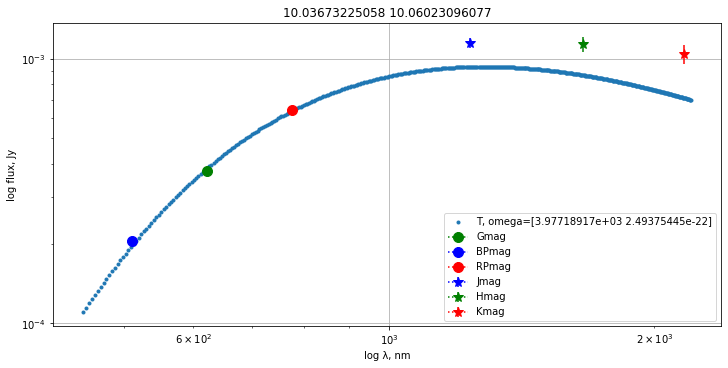

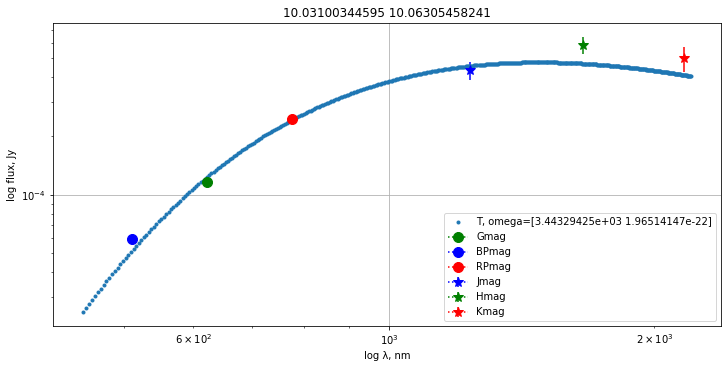

In [133]:
from specutils.fitting import fit_generic_continuum
from matplotlib.backends.backend_pdf import PdfPages
indxs = [0, 1, 2, 10, 11, 12, 13, 14]
figs = []
for j, row in enumerate(result_cat):
    flux_for_curve = []
    fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
    for i, mag in enumerate(mags):
        if not np.isnan(row[mag+'_Flux']):
            ax.errorbar(x=row[mag+'_WL'], y=row[mag+'_Flux'], yerr=row['e_' + mag + '_Flux'], markersize=10, fmt=colors[i], linestyle='dotted', label=mag)
            if i in indxs:
                flux_for_curve.append([row[mag+'_Flux'], row[mag+'_WL']])
                
    flux_for_curve.sort(key=lambda fl: fl[1])
    flux_for_curve = np.array(flux_for_curve)
    flux = flux_for_curve[:, 0]
    lam = flux_for_curve[:, 1]
    # print(lam)
    popt, pcov = curve_fit(f=func, xdata=lam, ydata=flux, p0=(5e3, 1e-23), bounds=([100, 1e-25], [1e6, 1e-20]))
    # print('popt =', popt)
    xdata = np.linspace(450, 2.2e3, 500)
    y_continuum_fitted = func(xdata, *popt)
    ax.plot(xdata, y_continuum_fitted, '.', label=f'T, omega={popt}')
    # except Exception as ex:
    #     print('FUCK', ex)
    ax.grid()
    ax.set_xlabel('log λ, nm')
    ax.set_ylabel('log flux, Jy')
    ax.set_title(f'{row["RAJ2000"]} {row["DEJ2000"]}')
    ax.loglog()
    ax.legend()
    # plt.show()
    figs.append(fig)
    # break
pdf = PdfPages("plots.pdf")
for fig in figs:
    pdf.savefig(fig)
pdf.close()

In [112]:
result_cat

array([(10.0594541 ,  9.92417556, 20.678057, 20.861614, 20.217699,         nan,         nan,         nan,         nan,         nan,         nan,        nan, 20.8416, 20.6425, 20.3735, 19.9568, 20.5264, 0.010388, 0.124852, 0.098618, 0.        , 0.        , 0.        , 0.   , 0.        , 0.        ,  0., 0.0489, 0.0435, 0.0319, 0.0115, 0.0627, 622., 1.72920007e-05, 1.65444703e-07, 511., 1.60630258e-05, 1.84713459e-06, 777., 2.09079429e-05, 1.89907963e-06, 1235.,        nan,            nan, 1662.,        nan,            nan, 2159.,        nan,            nan, 3368.,        nan,            nan, 4618.,            nan,            nan, 12082.,        nan,        nan, 22194.,        nan, nan, 481., 1.82598385e-05, 8.22396926e-07, 617., 1.75579096e-05, 7.03457289e-07, 752., 1.82573586e-05, 5.36419191e-07, 866., 2.35361878e-05, 2.49292746e-07, 962., 1.34269130e-05, 7.75388611e-07),
       (10.06293726,  9.92785094, 19.488579, 20.785307, 18.300808, 16.7329998 , 15.84599972, 15.68099976,         n

In [21]:
np.save('for_hist.npy', Gaia_tab)

In [22]:
Gaia_tab = np.load('for_hist.npy')

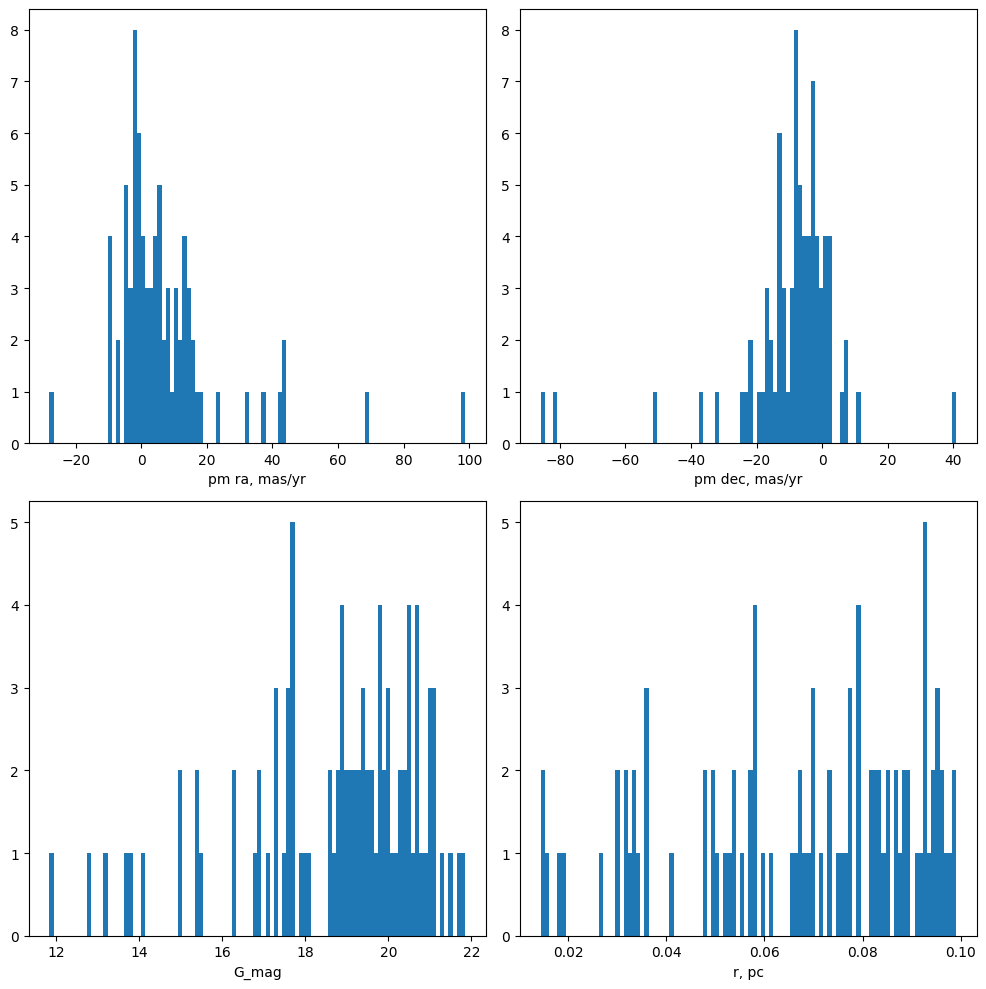

In [23]:
n_bins = 100
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=False, tight_layout=True)
axs[0][0].hist(Gaia_tab['pmRA'], bins=n_bins, label='pm ra')
axs[0][0].set_xlabel('pm ra, mas/yr')

axs[0][1].hist(Gaia_tab['pmDE'], bins=n_bins, label='pm dec')
axs[0][1].set_xlabel('pm dec, mas/yr')

axs[1][0].hist(Gaia_tab['Gmag'], bins=n_bins, label='G mag')
axs[1][0].set_xlabel('G_mag')

axs[1][1].hist(Gaia_tab['_r'], bins=n_bins, label='r')
axs[1][1].set_xlabel('r, pc')

plt.show()

In [28]:
from astroquery.skyview import SkyView
skyv = SkyView()
hduls = skyv.get_image_list(position="Sirius", radius=5*u.arcmin,
                            survey=['WISE 3.4', 'WISE 4.6', 'WISE 12', 'WISE 22'])
print(hduls)

['https://skyview.gsfc.nasa.gov/tempspace/fits/skv1297402527853_1.fits', 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv1297402527853_2.fits', 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv1297402527853_3.fits', 'https://skyview.gsfc.nasa.gov/tempspace/fits/skv1297402527853_4.fits']


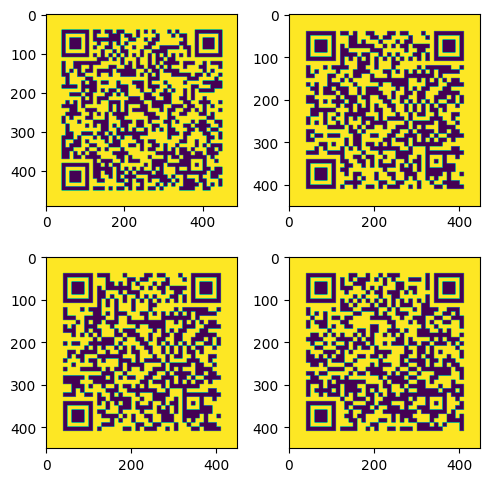

In [29]:
import qrcode
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

for i in range(len(hduls)):
    img = qrcode.make(hduls[i])
    img.save(f"W{i+1} code.png")
img = qrcode.make('https://www.youtube.com/watch?v=dQw4w9WgXcQ&pp=ygUXbmV2ZXIgZ29ubmEgZ2l2ZSB5b3UgdXA%3D')
img.save("W1 code.png")

img1 = mpimg.imread("W1 code.png")
img2 = mpimg.imread("W2 code.png")
img3 = mpimg.imread("W3 code.png")
img4 = mpimg.imread("W4 code.png")

fix, ax = plt.subplots(2, 2, figsize=(5, 5), sharey=False, tight_layout=True)
ax[0][0].imshow(img1)
ax[0][1].imshow(img2)
ax[1][0].imshow(img3)
ax[1][1].imshow(img4)

In [31]:
hduls = skyv.get_images(position="Vega", radius=3*u.arcmin,
                        survey=['WISE 3.4', 'WISE 4.6', 'WISE 12', 'WISE 22'])
for _ in range(len(hduls)):
    hduls[_].writeto(f"W{_+1} image.fits")

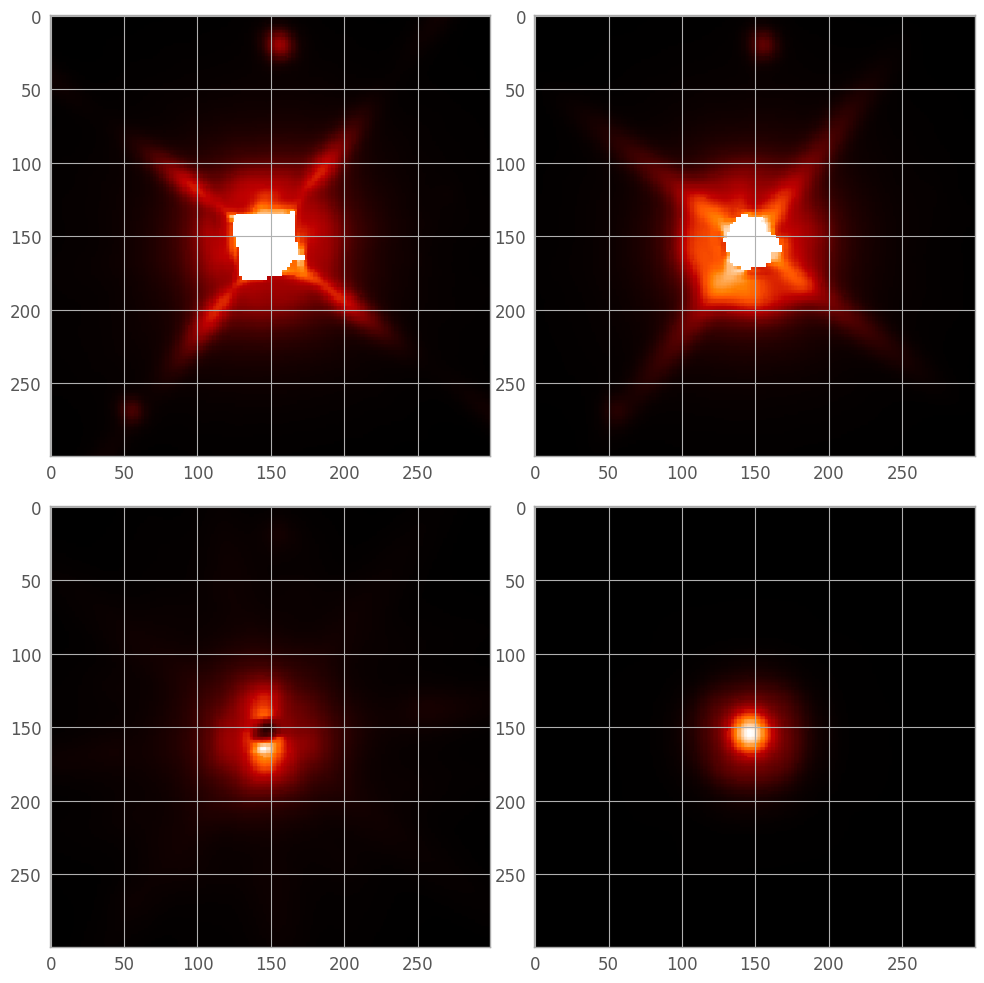

In [32]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)
image_file = []
image_data = []
for i in range(4):
    image_file.append(get_pkg_data_filename(f'W{i+1} image.fits'))
    image_data.append(fits.getdata(image_file[i], ext=0))
fix, ax = plt.subplots(2, 2, figsize=(10, 10), sharey=False, tight_layout=True)
ax[0][0].imshow(image_data[0])
ax[0][1].imshow(image_data[1])
ax[1][0].imshow(image_data[2])
ax[1][1].imshow(image_data[3])